# Анализ Модели

## Исследовательский анализ данных

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import rcParams

In [ ]:
!kaggle datasets download -d abhikjha/appa-real-face-cropped

In [ ]:
!unzip appa-real-face-cropped.zip -d datasets

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
# style MATPLOTLIBRC
custom_params = {
                'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
            }

In [4]:
PATH_TO = './datasets/'
PATH_TO_CSV = PATH_TO + 'labels.csv'
PATH_TO_IMG = PATH_TO + 'final_files/final_files'
dpi_k = custom_params['figure.dpi'] / rcParams['figure.dpi']
px = 1/custom_params['figure.dpi']

In [5]:
def to_px(size_px):
    px_density = int(
        round(
            size_px * px * dpi_k
        )
    )
    return px_density

In [22]:
def plot_hist(data, title='Histogram', custom_params=custom_params):
    with mpl.rc_context(custom_params):
        plt.hist(
            data,
            bins=100 #len(data.unique())
        )
        plt.show()

In [7]:
def plot_16_img(file_names_to_plot):
    fig = plt.figure(
            figsize=(to_px(560), to_px(560)),
            tight_layout=True,
        )
    i=0
    for name in file_names_to_plot:
        i += 1
        fig.add_subplot(4, 4, i)

        img = Image.open(PATH_TO_IMG + '/' + name)
        plt.imshow(np.array(img))

        plt.xticks([])
        plt.yticks([])
#         plt.tight_layout()

In [8]:
labels_df = pd.read_csv(PATH_TO_CSV)
display(labels_df.head())

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [9]:
display(
    labels_df['real_age'].describe()
)

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

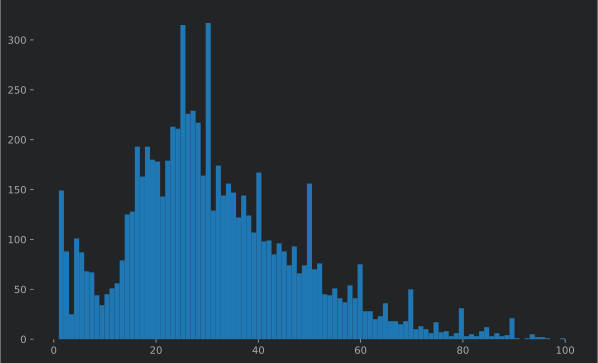

In [24]:
 plot_hist(labels_df['real_age'])

In [21]:
labels_df.groupby(by='real_age').count().sort_values(by='file_name', ascending=False)

,file_name
real_age,
30,317
25,315
27,229
26,226
28,217
...,...
96,2
91,1
93,1


Интересно что возросты 25 и 30 самые популярные в наборе данных.  
Распределение приближено к нормальному, но смещено вправо, а в левой части есть подьём гистограммы на значениях около 5 лет.

In [11]:
plot_16_img(labels_df['file_name'].sample(16))

In [12]:
quantile_left = labels_df['real_age'].quantile(0.005)
quantile_right = labels_df['real_age'].quantile(0.995)

In [13]:
print(
    quantile_left,
    quantile_right,
    sep='\n'
)

1.0
88.05000000000018


In [14]:
faces_outside_quantiles = labels_df.loc[
        labels_df['real_age'] >= quantile_right,
        'file_name'
    ].sample(8)

faces_outside_quantiles = pd.concat(
        [labels_df.loc[
                labels_df['real_age'] <= quantile_left,
                'file_name'
            ].sample(8),
         faces_outside_quantiles
        ],
        axis=0,
        ignore_index=True
    )

In [15]:
plot_16_img(faces_outside_quantiles)

## Вывод Модели Из GPU

## Анализ Обучения Модели

Похожего результата можно было добиться и за 14 эпох..  
Использовал слой dropout (Dropout), потомучто нашел совет на kaggle, чтобы модель не переобучалась.